In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Read and explore data**

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Summary Statistics

In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Check for missing values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for duplication

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Unique values

In [9]:
for column in df:
  print(f'Unique values in {column}: {df[column].unique()}\n')

Unique values in Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Unique values in Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Unique values in BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Unique values in SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34

In [10]:
num_features = df.shape[1]
num_features

9

**Define outliers in data: by Interquartile Range (IQR) Method:**

In [11]:
import numpy as np
df_cleaned = df.copy()
for column in df_cleaned:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #assigning only values between q1 and q3 in the new dataframe

    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) &
                            (df_cleaned[column] <= upper_bound)]


In [12]:
df_cleaned.shape

(636, 9)

In [13]:
df_cleaned

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[636 rows x 9 columns]

Standardization of numerical features:

In [14]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
n_rows = len(numeric_cols)

 **Data Visualization**

 Create a figure with subplots (two columns per row: one for boxplot, one for distribution plot)

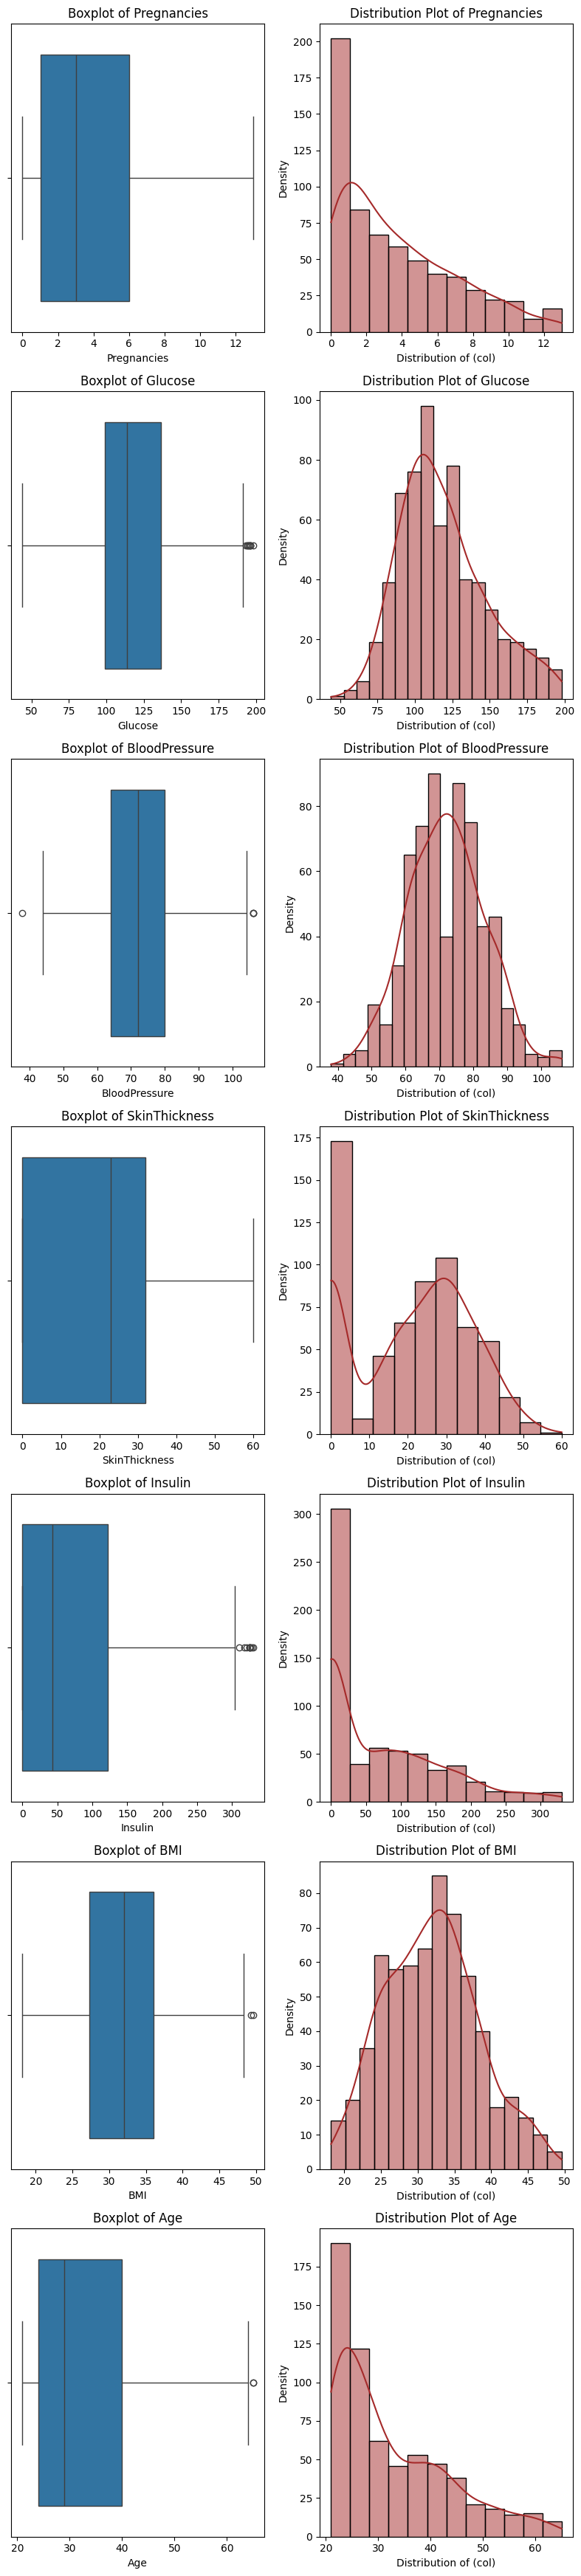

In [15]:
plt.figure(figsize=(8, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    # Boxplot part
    plt.subplot(n_rows, 2, 2*i+1)
    sns.boxplot(x=df_cleaned[col], orient='h')
    plt.xlabel(f"{col}")
    plt.title(f"Boxplot of {col}")
    #i use 2*i+2 as the index, ensure that the distribution plots are placed in the second column, alternating with the boxplots in the first column.
    # Distribution plot part
    plt.subplot(n_rows, 2, 2*i+2)
    sns.histplot(df_cleaned[col], kde=True, color='brown')
    plt.xlabel(f"Distribution of (col)")
    plt.ylabel('Density')
    plt.title(f"Distribution Plot of {col}")

plt.tight_layout()
plt.show()


Histogram
(creates a separate figure for each column)

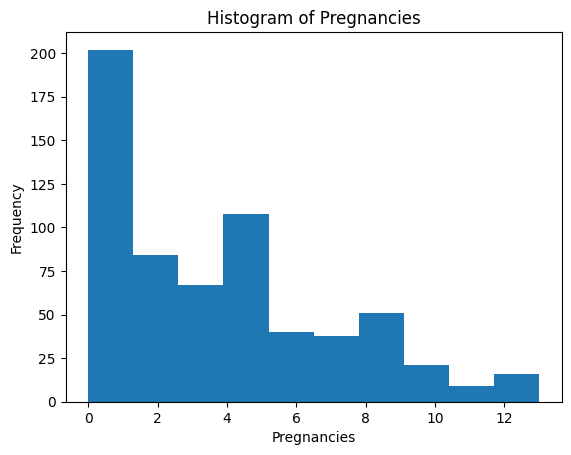

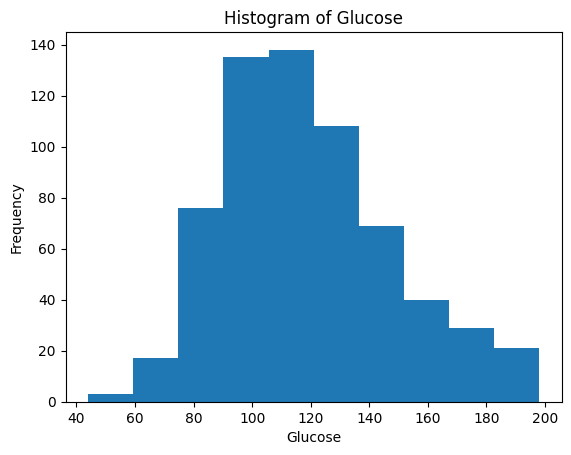

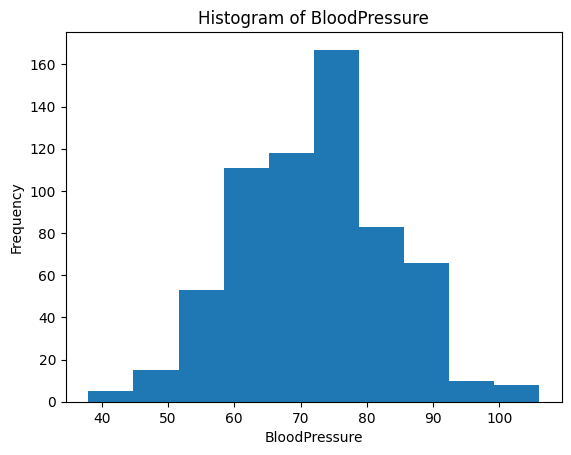

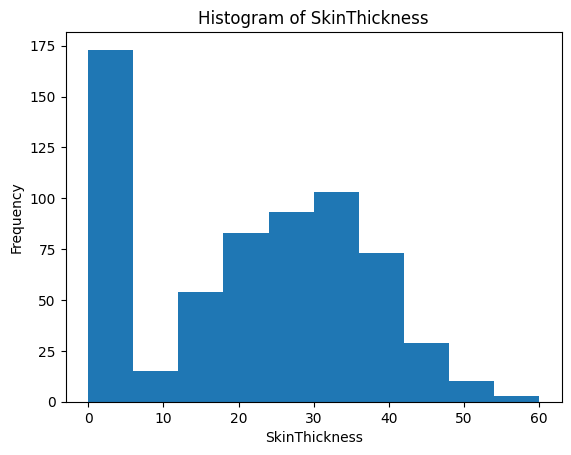

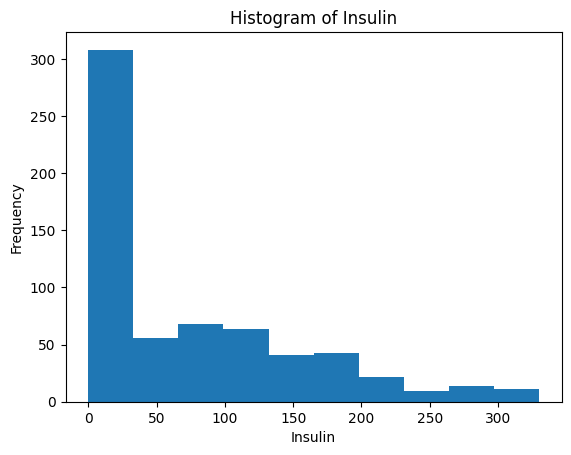

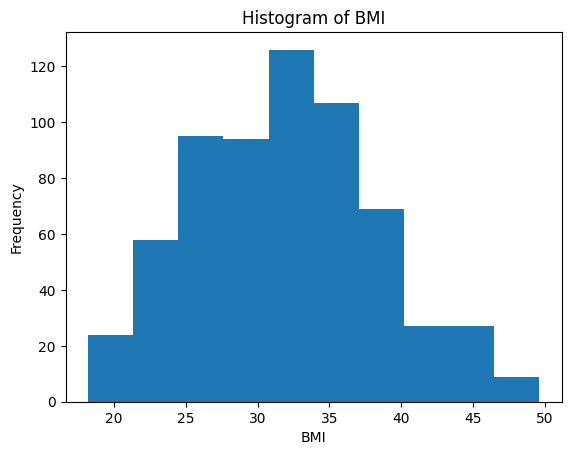

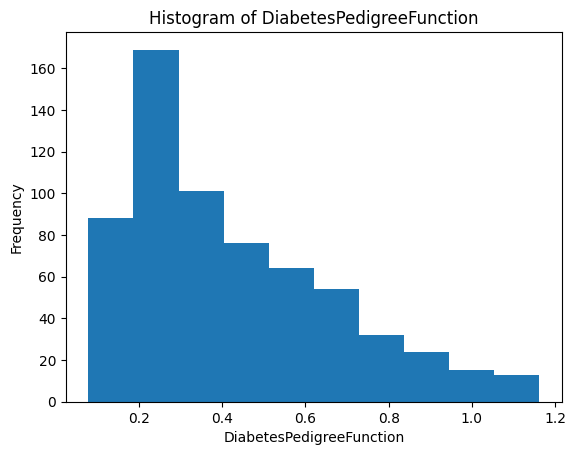

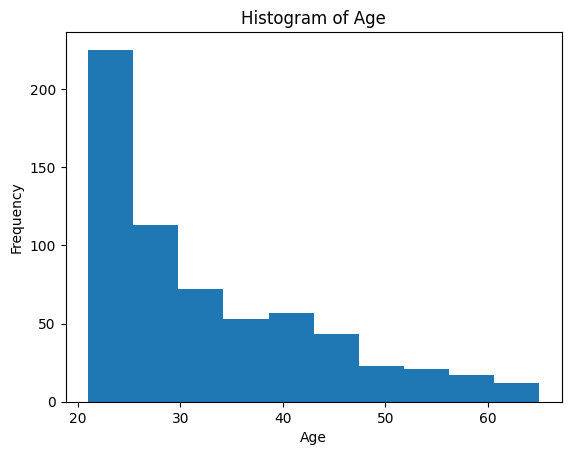

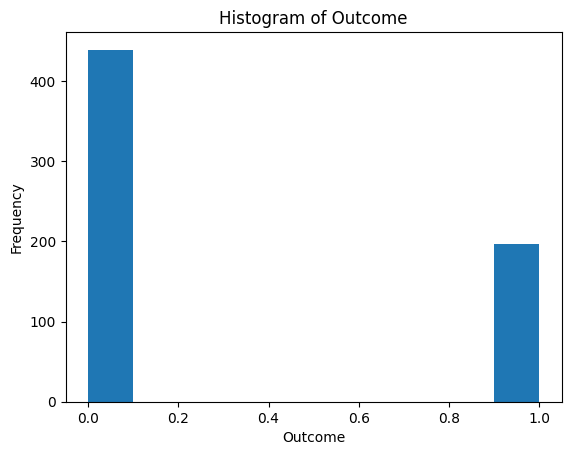

In [16]:
for column in df_cleaned:
  plt.hist(df_cleaned[column])
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


Histogram (creates a single figure with multiple subplots, one for each column.)

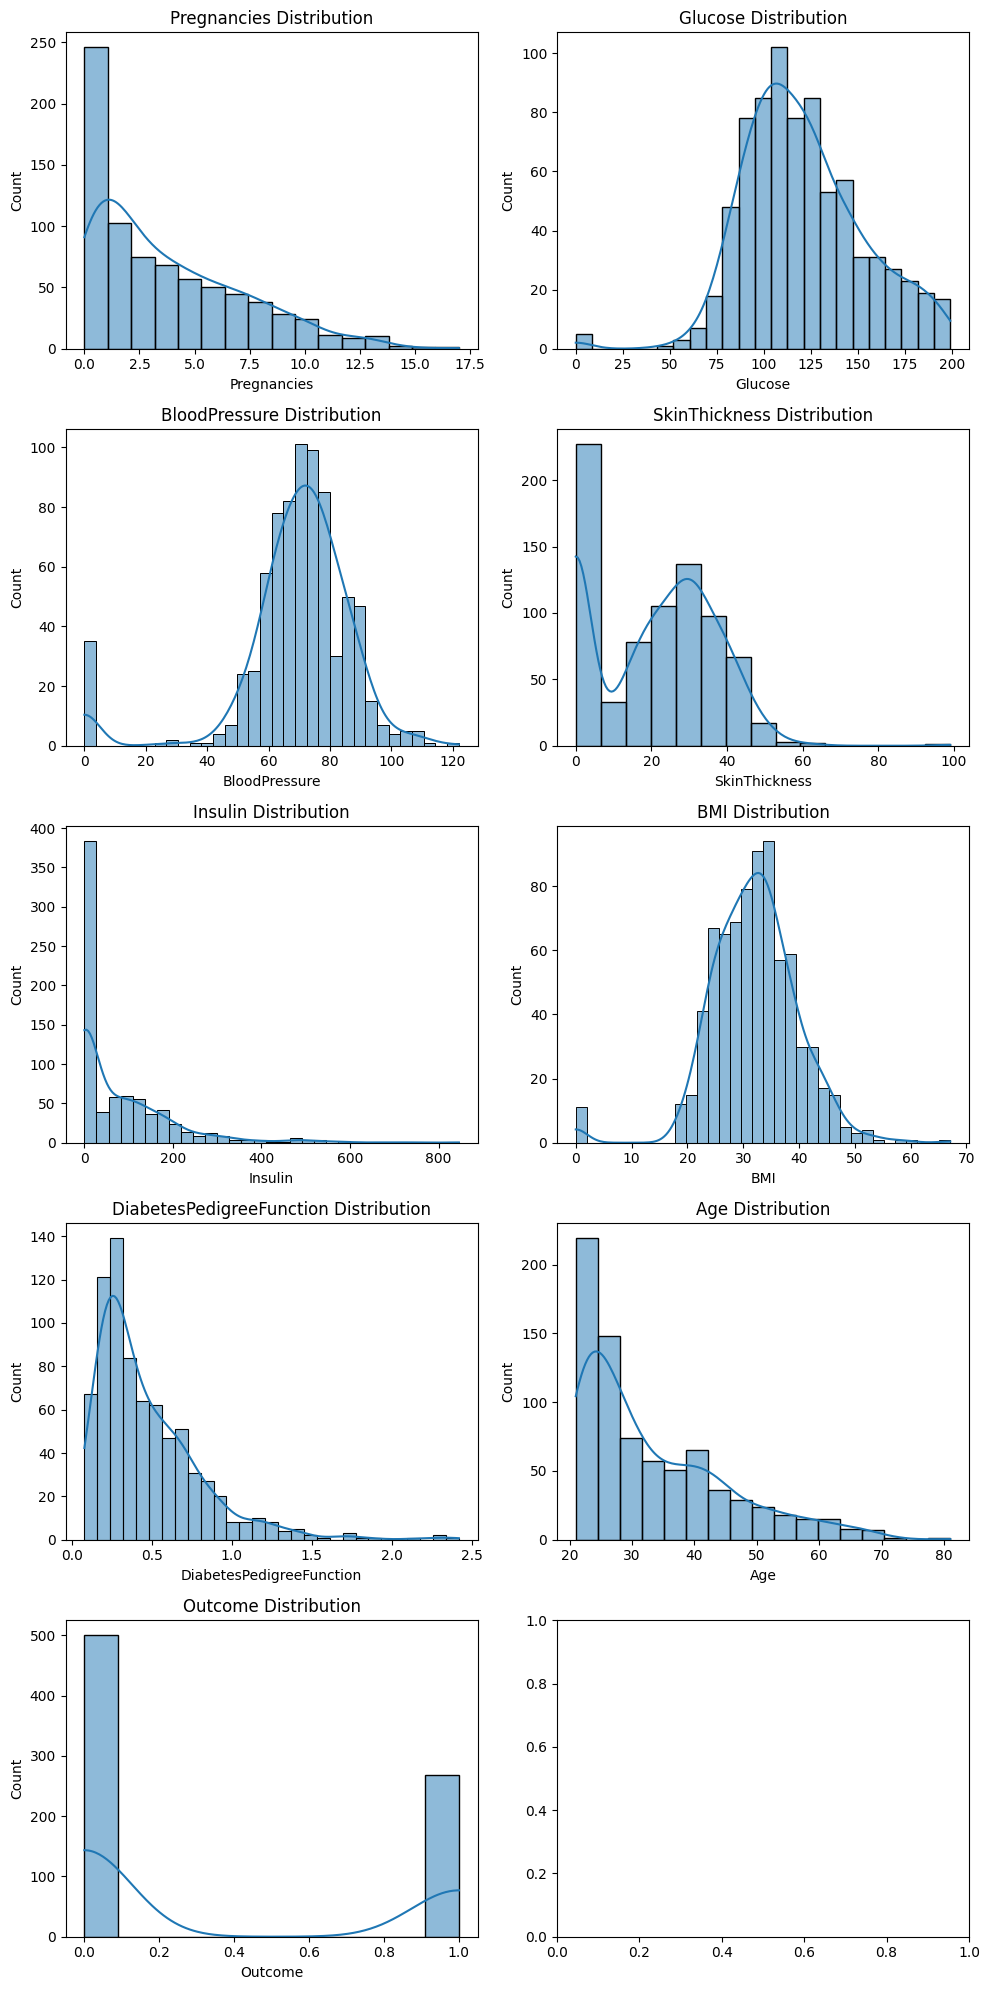

In [17]:
n_cols = 2
n_rows = len(df.columns) // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 8 * n_rows // n_cols))
for i, col in enumerate(df.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(x=col, data=df, kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

Scatter plot

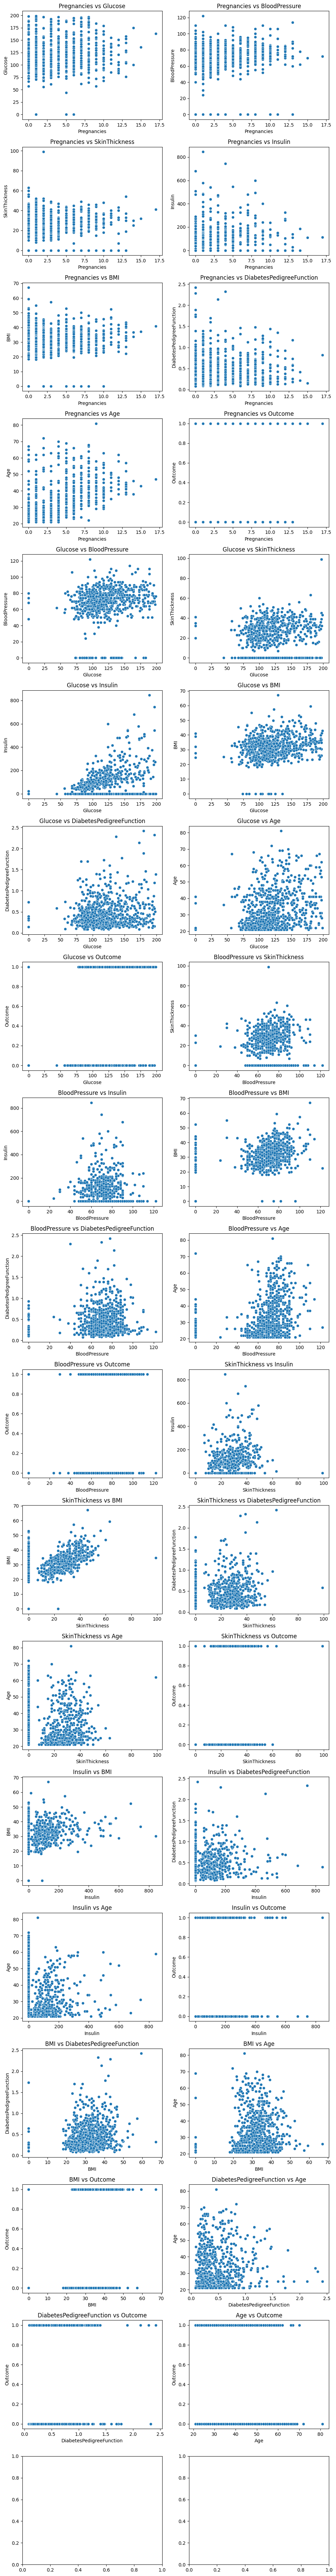

In [18]:
import itertools
n_rows = len(df.columns) * (len(df.columns) - 1) // 2 // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 8 * n_rows // n_cols))
my_pair = list(itertools.combinations(df.columns, 2))
for i, (x, y) in enumerate(my_pair):
    row = i // n_cols
    col_idx = i % n_cols
    sns.scatterplot(x=x, y=y, data=df, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

Visualization of distribution of each column by outcomes

<ipython-input-19-03f4cb5f833e>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df_cleaned[col], hue=df_cleaned['Outcome'], fill=True)


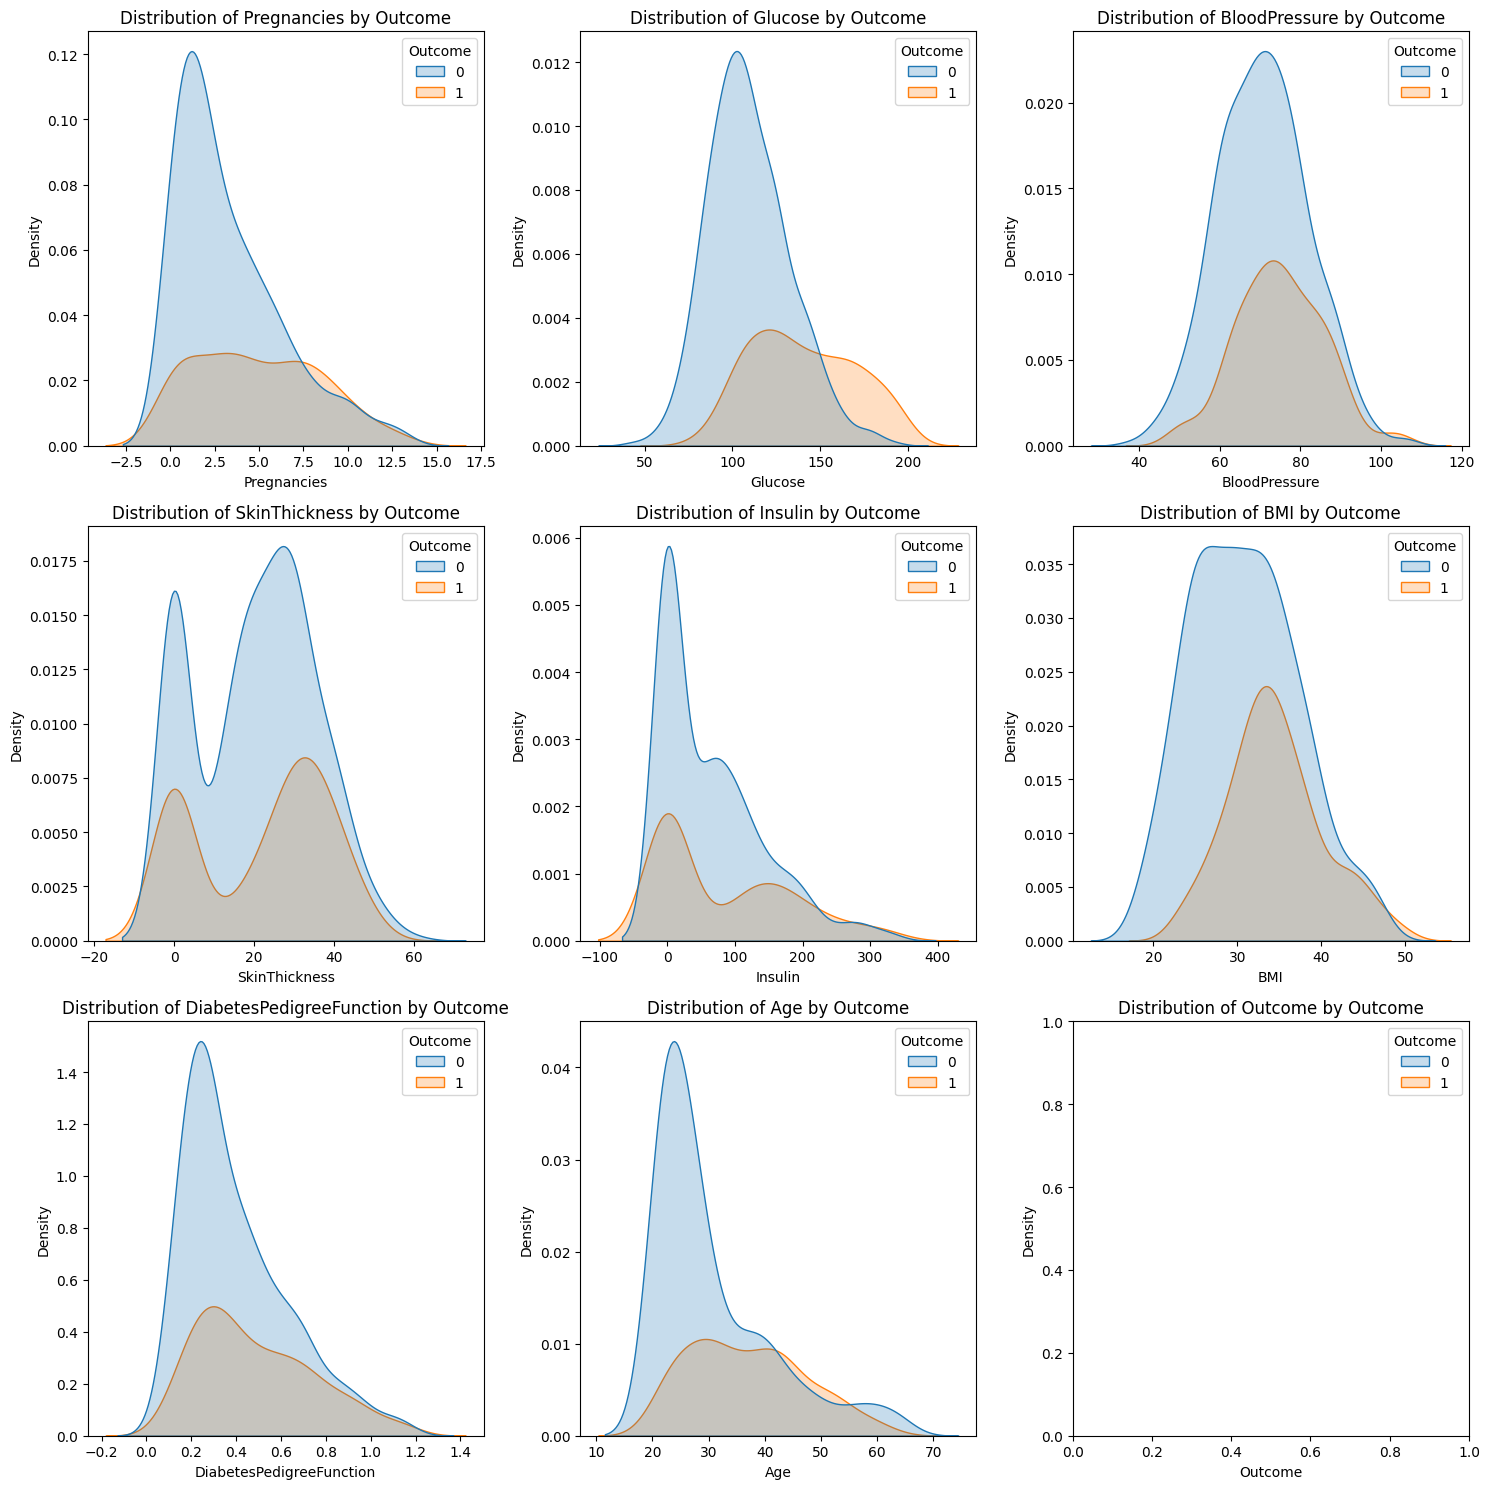

In [19]:
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(x=df_cleaned[col], hue=df_cleaned['Outcome'], fill=True)
    plt.title(f'Distribution of {col} by Outcome')
    plt.tight_layout()

plt.show()

Heatmap

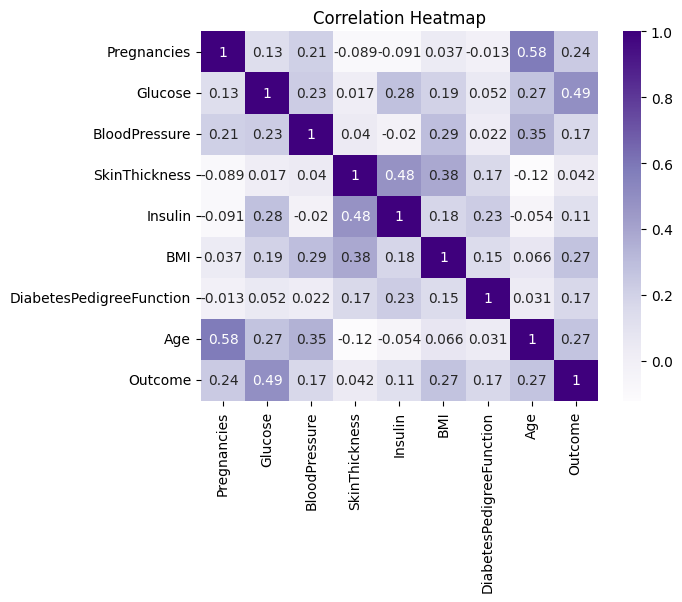

In [20]:
import seaborn as sns

sns.heatmap(df_cleaned.corr(), annot=True, cmap='Purples')
plt.title('Correlation Heatmap')
plt.show()


Bar plot

<ipython-input-21-06a074509e20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-21-06a074509e20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-21-06a074509e20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y=col, data=df, palette='Set2')
<ipython-input-21-06a074509e20>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

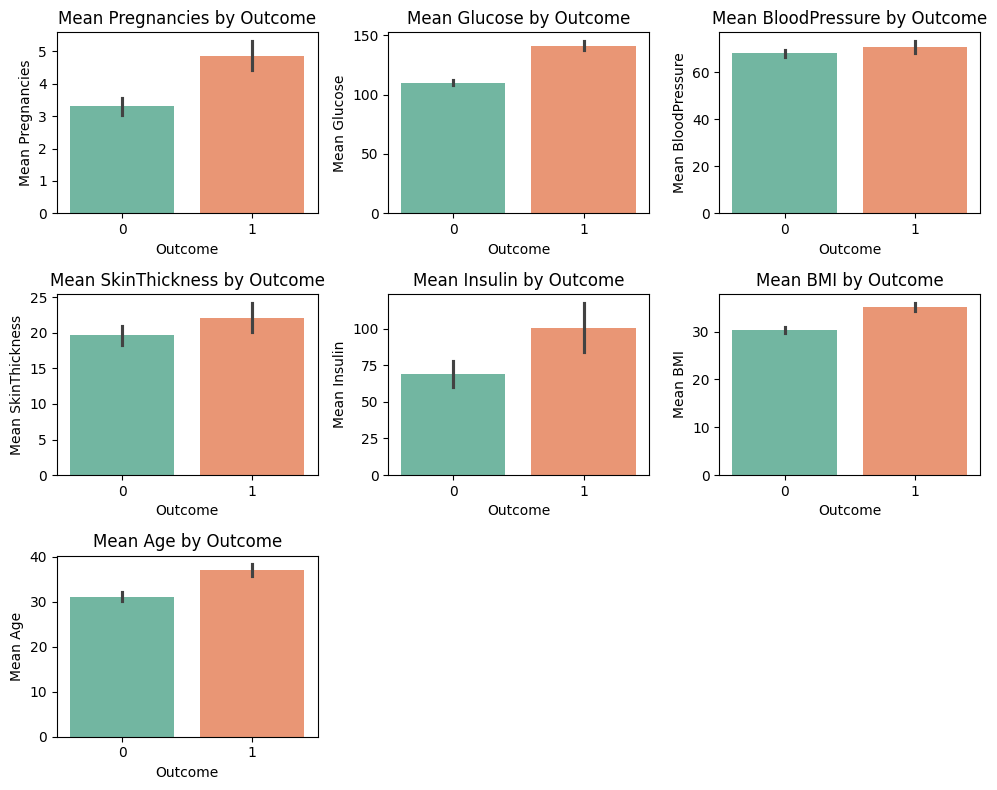

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of mean values for each feature grouped by 'Outcome'
plt.figure(figsize=(10, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x='Outcome', y=col, data=df, palette='Set2')
    plt.title(f'Mean {col} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(f'Mean {col}')

plt.tight_layout()
plt.show()


pairplot

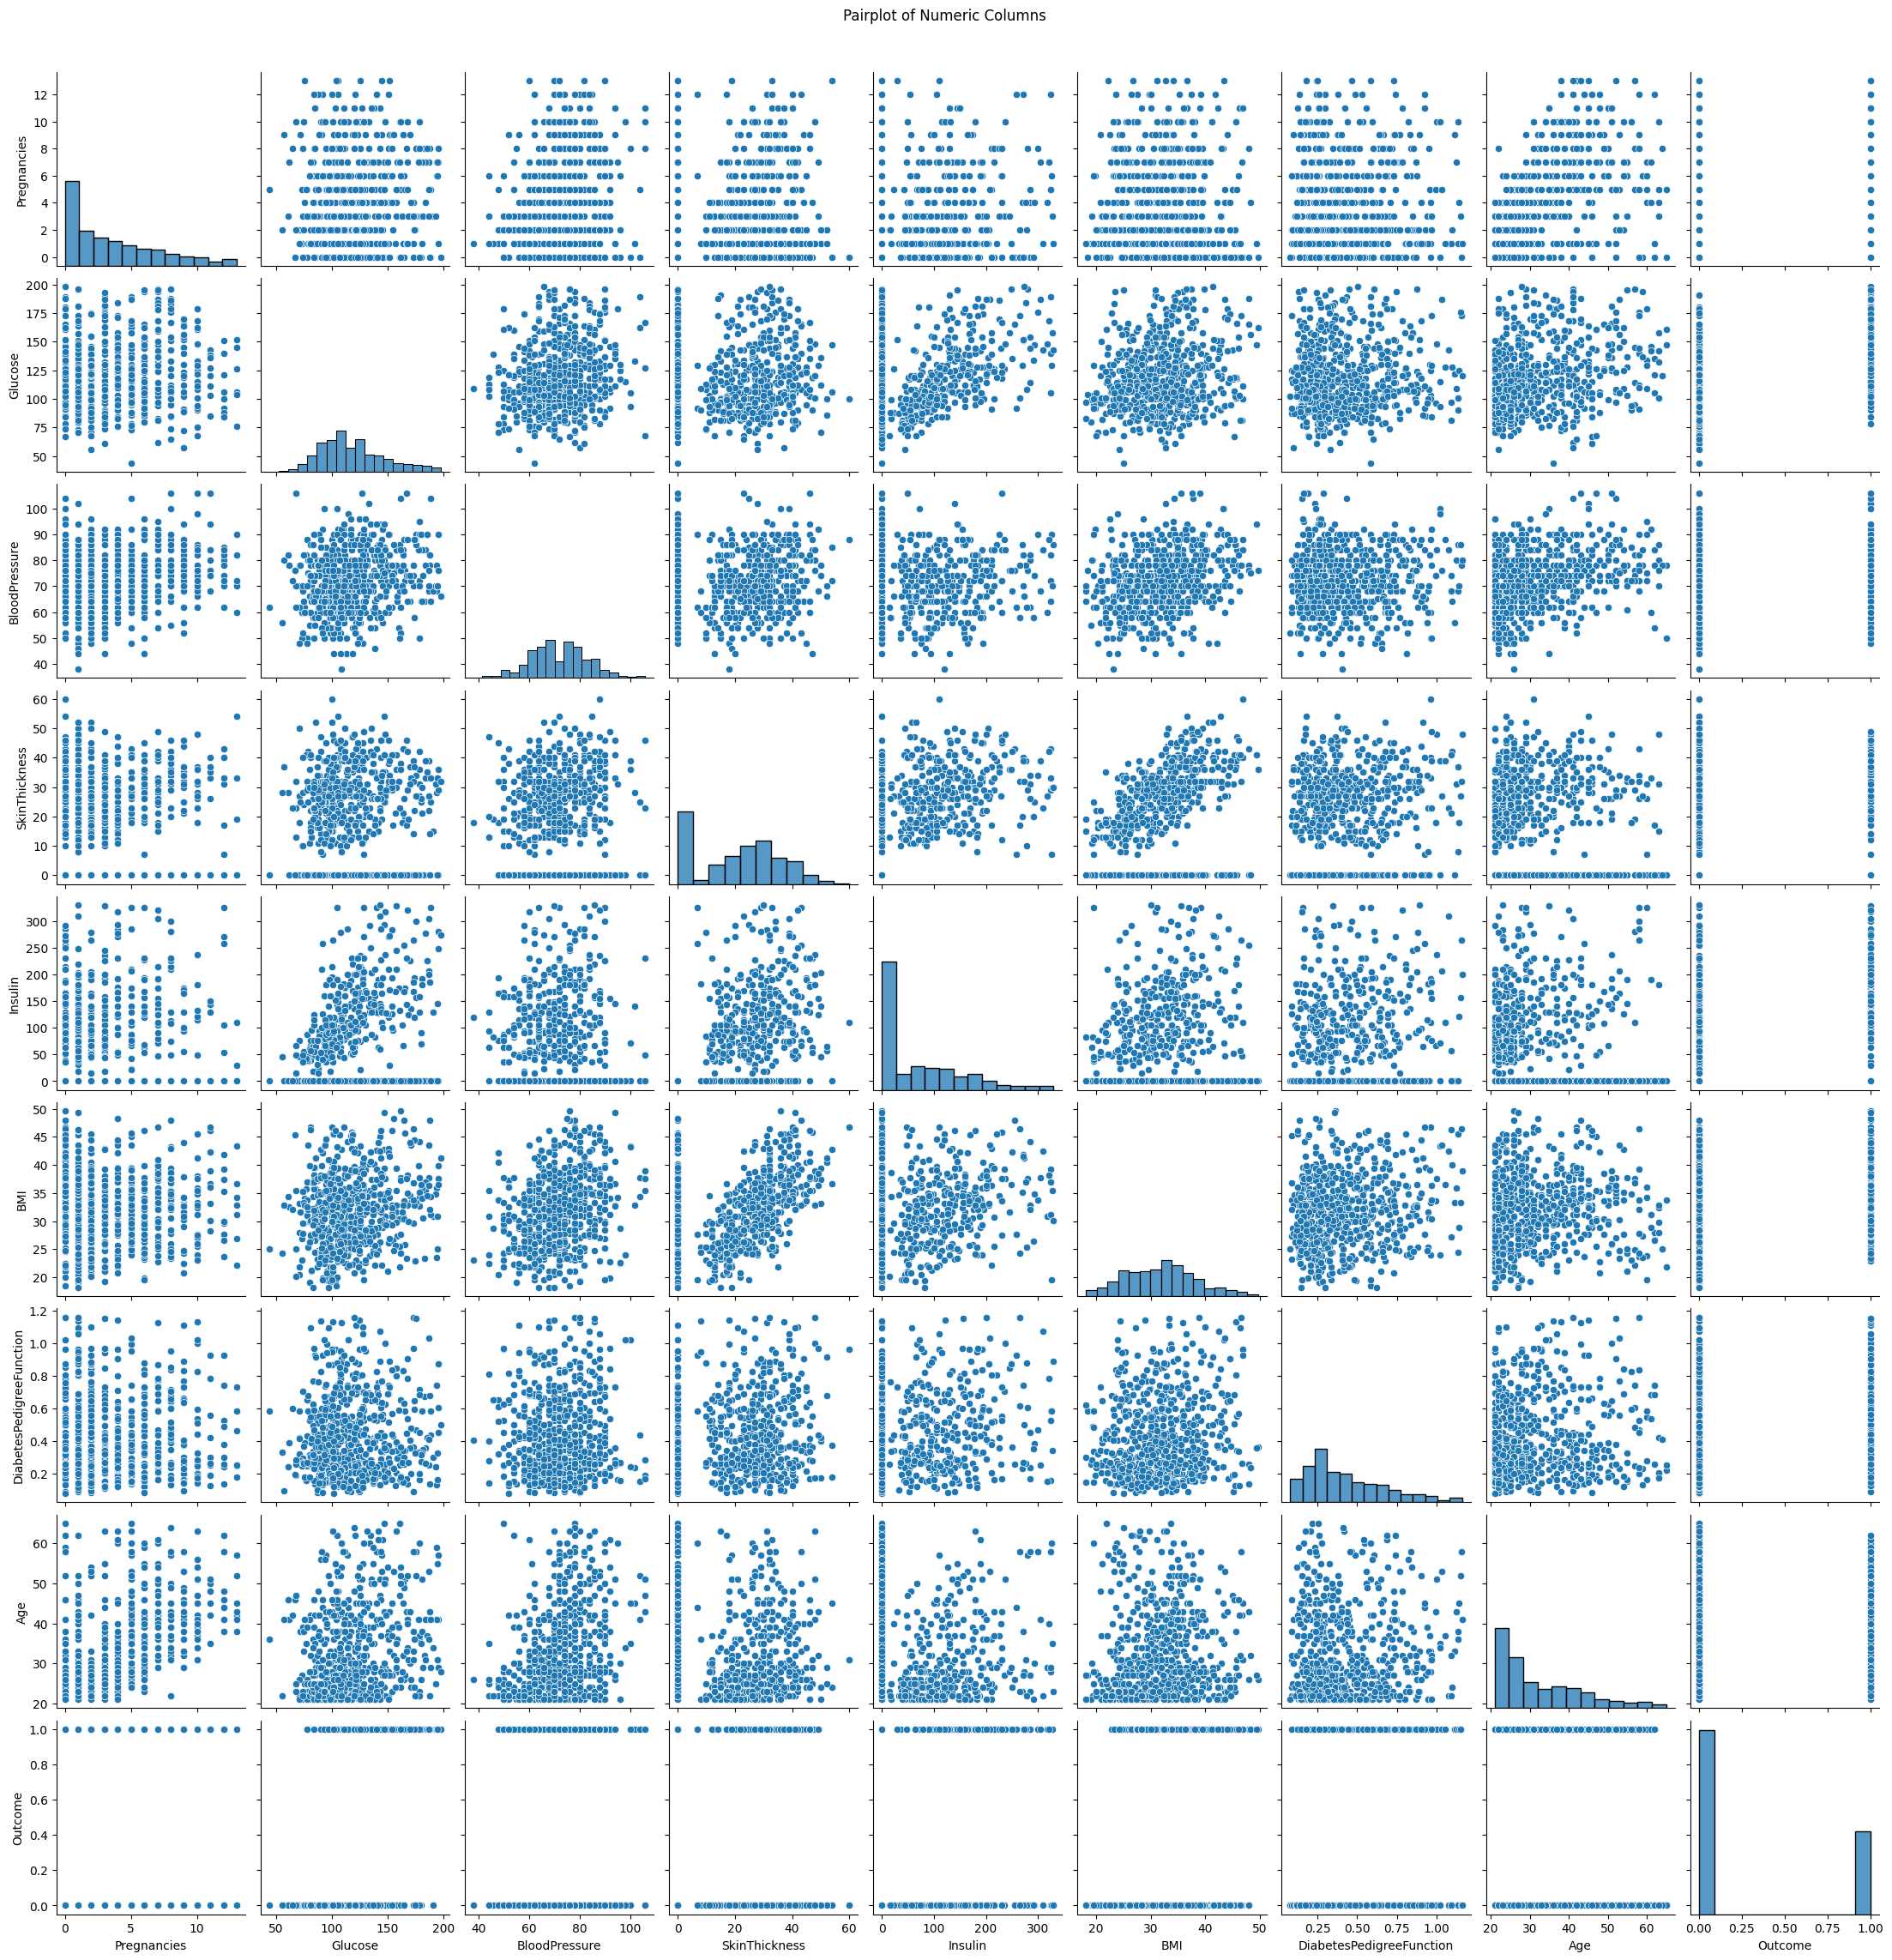

In [22]:
sns.pairplot(df_cleaned)
plt.suptitle('Pairplot of Numeric Columns', y=1.02)
plt.show()

**Regression of DiabetesPedigreeFunction**

1. Linear Regression

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
#Split dataset
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Outcome']]
y = df['DiabetesPedigreeFunction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model (performance)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Linear Regression:
MSE: 0.08359869294623203
R^2 Score: 0.1196080299256399
MAE: 0.23133214693806273


**Note:** A higher R^2 score indicates a better fit of the model to the data
A lower MSE indicates a better fit of the model to the data

2.Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

# Create and train the model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Ridge Regression:
MSE: 0.08362044653820902
R^2 Score: 0.11937893917048736
MAE: 0.23135465134918284


3.Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

# Create and train the model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# Evaluate the model
print("Lasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Lasso Regression:
MSE: 0.08782451272367424
R^2 Score: 0.07510520735837356
MAE: 0.2369325102952593


4.SVR

In [26]:
from sklearn.svm import SVR

# Create and train the model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Support Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Support Vector Regression:
Mean Squared Error: 0.09213336419447064
R^2 Score: 0.029727963989603534
MAE: 0.22971172470653328


**Comparison between the regression models**

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split dataset
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome']]
y = df['DiabetesPedigreeFunction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR": SVR(kernel='rbf')
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

               Model       MSE  R^2 Score       MAE
0  Linear Regression  0.083599   0.119608  0.231332
1   Ridge Regression  0.083620   0.119379  0.231355
2   Lasso Regression  0.087825   0.075105  0.236933
3                SVR  0.092133   0.029728  0.229712


**Evaluation results: The results of Ridge Regression and Linear Regression are closely aligned, indicating similar model performance.:**::

**Classification:** with KNN

In [28]:
# Split dataset into features and the target (outcome) column:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train_scaled, y_train)
y_pred = KNN.predict(X_test_scaled)

In [29]:
Accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {Accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7539267015706806
Confusion Matrix:
[[123  15]
 [ 32  21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       138
           1       0.58      0.40      0.47        53

    accuracy                           0.75       191
   macro avg       0.69      0.64      0.66       191
weighted avg       0.74      0.75      0.74       191



Visualize confusion.matrix

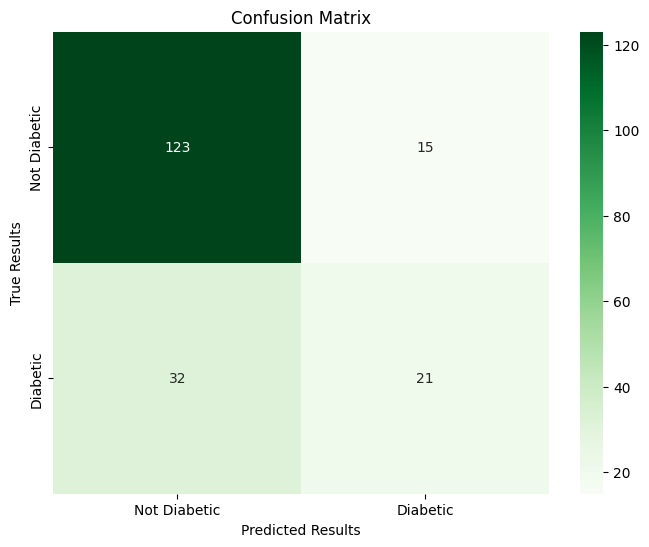

In [30]:
true_results = (y_test > 0.5).astype(int)
pred_results = (y_pred > 0.5).astype(int)

CM = confusion_matrix(true_results, pred_results)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Diabetic', 'Diabetic'],
            yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted Results')
plt.ylabel('True Results')
plt.title('Confusion Matrix')
plt.show()

The model has a good accuracy ,but it struggles with identifying 'Diabetic' cases. It's strong in detecting 'Not Diabetic'

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.54
Recall: 0.40
F1-Score: 0.46


Clustering: with K-mean

<ipython-input-33-146fb98d5945>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, SSE, 'bo-', color='green')


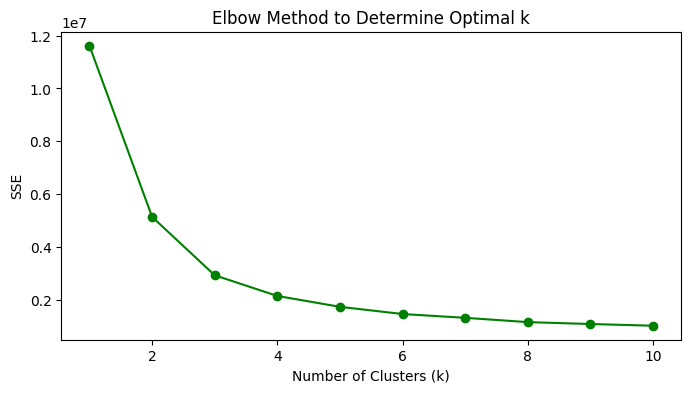

In [33]:
from sklearn.cluster import KMeans
X = df.iloc[:, :-1]
SSE = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(K, SSE, 'bo-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [34]:
k_num=5
kmeans = KMeans(n_clusters=k_num, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
# Analyze clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           4.250000  149.615385      74.038462      30.865385  291.480769   
1           4.403646  119.096354      67.372396      11.932292    0.562500   
2           2.638418  101.954802      68.841808      26.853107   77.841808   
3           3.111111  165.833333      73.444444      35.666667  548.833333   
4           3.781022  133.598540      71.861314      30.583942  162.452555   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                            
0        35.575000                  0.558635  33.903846  0.500000  
1        30.954167                  0.422201  35.583333  0.364583  
2        31.096610                  0.469458  27.836158  0.129944  
3        36.961111                  0.660667  34.555556  0.666667  
4        34.048175                  0.556504 

In [35]:
print (SSE)

[11615812.91832722, 5142376.455984387, 2932905.8813211555, 2151320.938003853, 1739468.6212710738, 1467139.387013463, 1323650.6499522526, 1161086.0601046665, 1089477.3484453203, 1024917.0714485882]


**Deep learning model:**

In [36]:
X = df.iloc[:, :-1]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = Sequential([
    Dense(12, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6059 - loss: 3.1587 - val_accuracy: 0.4194 - val_loss: 1.5323
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5005 - loss: 1.1226 - val_accuracy: 0.4194 - val_loss: 1.2538
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 1.0588 - val_accuracy: 0.4194 - val_loss: 1.0470
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.8903 - val_accuracy: 0.5323 - val_loss: 0.9354
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5933 - loss: 0.7833 - val_accuracy: 0.5484 - val_loss: 0.8301
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5827 - loss: 0.7440 - val_accuracy: 0.5968 - val_loss: 0.8238
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.7080 - val_accuracy: 0.5968 - val_loss: 0.9136
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - loss: 0.7069 - val_accuracy: 0.5484 - val_loss: 0.7422
Epo

In [38]:
# Predict probabilities
predictions = model.predict(X_test)
y_pred = (predictions > 0.5)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8990 - loss: 0.3485 
Test Loss: 0.3605
Test Accuracy: 0.8766
